---
<h1 style="text-align: center;">Data Analytics Assignment 3</h1>

<div style="text-align: center;">
    <p><strong>Student 1:</strong></p>
    <p>Name: Vedant Nipane</p>
    <p>Roll No: 2021102040</p>
</div>

<div style="text-align: center;">    
    <p><strong>Student 2:</strong></p>
    <p>Name: Ajay Ray</p>
    <p>Roll No: 2021102032</p>
</div>

---

# 1. Preprocessing
### Importing Libraries

In [52]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import itertools
from collections import Counter
from sklearn.model_selection import train_test_split

### Importing Dataset

In [2]:
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

### Basic Exploration

In [3]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


*Select the movie with rating greater then 2*


In [5]:
filtered_ratings = ratings_df[ratings_df['rating']>2]

In [6]:
print(filtered_ratings['rating'].unique())
print(filtered_ratings.head())

[4.  5.  3.  4.5 3.5 2.5]
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


**Group user id and filter only those users with more then 10 movie rating**


In [7]:
# group user id and filter only those users with more then 10 movie rating
grouped_data = filtered_ratings.groupby('userId').agg({'movieId': list})
grouped_data.rename(columns={"movieId":"Movie Ids"},inplace=True)
print(grouped_data)

                                                Movie Ids
userId                                                   
1       [1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163,...
2       [318, 333, 1704, 3578, 6874, 8798, 46970, 4851...
3       [849, 1275, 1371, 1587, 2288, 2851, 3024, 3703...
4       [21, 45, 52, 58, 106, 125, 162, 171, 176, 215,...
5       [1, 21, 34, 36, 39, 50, 58, 110, 150, 153, 232...
...                                                   ...
606     [1, 7, 11, 15, 17, 18, 28, 29, 32, 36, 46, 47,...
607     [1, 11, 25, 34, 36, 86, 110, 150, 153, 165, 18...
608     [1, 10, 16, 21, 31, 32, 34, 39, 47, 50, 70, 88...
609     [1, 10, 110, 116, 137, 150, 161, 185, 208, 231...
610     [1, 6, 16, 32, 47, 50, 70, 95, 110, 111, 112, ...

[610 rows x 1 columns]


In [8]:
filtered_users = grouped_data[grouped_data['Movie Ids'].apply(len) > 10]

transactional_data=filtered_users.reset_index()
print(transactional_data.head())

   userId                                          Movie Ids
0       1  [1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163,...
1       2  [318, 333, 1704, 3578, 6874, 8798, 46970, 4851...
2       3  [849, 1275, 1371, 1587, 2288, 2851, 3024, 3703...
3       4  [21, 45, 52, 58, 106, 125, 162, 171, 176, 215,...
4       5  [1, 21, 34, 36, 39, 50, 58, 110, 150, 153, 232...


In [9]:
# # Explode the movieId lists so each userId corresponds to a single movieId row
# exploded_data = filtered_users.explode('movieId').reset_index()
# print(exploded_data)
# # Merge with movies.csv to get movie titles based on movieId
# merged_data = exploded_data.merge(movies_df, how='inner', on='movieId')
# print(merged_data.head())
# transactional_data = merged_data.groupby('userId').agg({'title': list})
# print(transactional_data)

In [10]:
# transactional_data = transactional_data.reset_index()
# print(transactional_data.head())
# print(transactional_data.columns)

### Split the data into 80:20

In [11]:
transactional_data.head()

,userId,Movie Ids
0,1,"[1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163,..."
1,2,"[318, 333, 1704, 3578, 6874, 8798, 46970, 4851..."
2,3,"[849, 1275, 1371, 1587, 2288, 2851, 3024, 3703..."
3,4,"[21, 45, 52, 58, 106, 125, 162, 171, 176, 215,..."
4,5,"[1, 21, 34, 36, 39, 50, 58, 110, 150, 153, 232..."


#### Function to split the data

In [12]:
# Function to split the data

def split_user_movies(movies_list):
    # Shuffle the movie list randomly
    shuffled_movies = np.random.permutation(movies_list)
    split_index = int(0.8 * len(shuffled_movies))
    train_movies = shuffled_movies[:split_index]
    test_movies = shuffled_movies[split_index:]
    return train_movies, test_movies


#### Splitting

In [13]:
# Initialize lists to store training and test data
training_data = []
test_data = []

# Iterate over each user and their corresponding movie list
for index, row in transactional_data.iterrows():
    user_id = row['userId']
    movies_list = row['Movie Ids']  # The list of movies rated by this user
    
    # Split the movies into training and test
    train_movies, test_movies = split_user_movies(movies_list)
    
  
    training_data.append((user_id, train_movies))
    
   
    test_data.append((user_id, test_movies))
        
# Convert the training and test data lists into dataframes
training_df = pd.DataFrame(training_data, columns=['userId', 'Movie Ids'])
test_df = pd.DataFrame(test_data, columns=['userId', 'Movie Ids'])

# Output the sizes of the resulting datasets
print(f'Training set size: {len(training_df)}')
print(f'Test set size: {len(test_df)}')

# Preview the datasets
print("\nTraining Data Sample:\n", training_df.head())
print("\nTest Data Sample:\n", test_df.head())

Training set size: 607
Test set size: 607

Training Data Sample:
    userId                                          Movie Ids
0       1  [3703, 3439, 1080, 3053, 1587, 2478, 2273, 157...
1       2  [8798, 99114, 60756, 86345, 91529, 333, 46970,...
2       3  [2851, 2288, 3024, 1371, 6835, 5181, 1587, 574...
3       4  [1923, 3033, 4246, 912, 1025, 910, 2843, 914, ...
4       5  [232, 50, 265, 515, 1, 608, 36, 349, 261, 153,...

Test Data Sample:
    userId                                          Movie Ids
0       1  [2826, 1009, 3168, 2054, 3793, 3448, 2116, 196...
1       2         [109487, 318, 79132, 106782, 71535, 58559]
2       3                          [26409, 3703, 7991, 1275]
3       4  [1283, 3079, 3508, 3851, 1641, 1197, 919, 1250...
4       5           [410, 364, 590, 592, 247, 296, 531, 344]


# 2. FP growth algorithm implementation

## 2.1 FP-Tree Node Class and Tree Construction Functions

#### This class defines the basic structure for an FP-Tree node.

In [14]:
class Node:
    def __init__(self,itemName,frequency,parentNode):
        self.itemName=itemName
        self.count=frequency
        self.parent=parentNode
        self.children={}
        self.next=None
        
        def increment(self,frequency):
            self.count+=frequency
            
        def display(self,ind=1):
            print(' '* ind,self.itemName, ' ',self.count)
            for child in list(self.children.values()):
                child.display(ind+1)
                

#### This function updates the header table to ensure all nodes with the same item name are linked.

In [15]:
# Update the header table to link nodes with the same item name
def updateHeaderTable(item,targetNode,headerTable):
    if(headerTable[item][1]==None):
        headerTable[item][1]=targetNode
    else:
        currentNode=headerTable[item][1]
        while currentNode.next!=None:
            currentNode=currentNode.next
        currentNode.next=targetNode


In [16]:

def updateTree(item,treeNode,headerTable,frequency):
    if (item in treeNode.children):
#         treeNode.children[item].increment(frequency)
        treeNode.children[item].count+=(frequency)

    else:
        newItemNode=Node(item,frequency,treeNode)
        treeNode.children[item]=newItemNode
        
        updateHeaderTable(item,newItemNode,headerTable)
    return treeNode.children[item]

#### This function constructs the FP-Tree by counting item frequencies and building the tree.

In [17]:
from collections import defaultdict
# Construct FP-Tree by adding each item set to the tree

def constructTree(itemSetList,frequency,minSup):
    headerTable=defaultdict(int)
    
    # First pass: Count frequency of each item
    for idx ,itemSet in enumerate(itemSetList):
        for item in itemSet:
            headerTable[item]+=frequency[idx]
    # Remove items not meeting minSup

    headerTable = dict((item, sup) for item, sup in headerTable.items() if sup >= minSup)
    if(len(headerTable)==0):
        return None,None
    
    for item in headerTable:
        headerTable[item]=[headerTable[item],None]
    
    # Second pass: Build the FP-Tree
    fpTree=Node('Null',1,None)
    for idx ,itemSet in enumerate(itemSetList):
        itemSet=[item for item in itemSet if item in headerTable]
        itemSet.sort(key=lambda item:headerTable[item][0],reverse=True)
        
        currentNode=fpTree
        for item in itemSet:
            currentNode=updateTree(item,currentNode,headerTable,frequency[idx])
    
    
    return fpTree,headerTable

In [18]:
def ascendFPTree(node,prefixPath):
    if node.parent !=None:
        prefixPath.append(node.itemName)
        ascendFPTree(node.parent,prefixPath)

def findPrefixPath(basePat,headerTable):
    treeNode=headerTable[basePat][1]
    condPats=[]
    frequency=[]
    while treeNode!=None:
        prefixPath=[]
        ascendFPTree(treeNode,prefixPath)
        if len(prefixPath)>1:
            condPats.append(prefixPath[1:])
            frequency.append(treeNode.count)
        
        treeNode=treeNode.next
    return condPats,frequency

## 2.2 Mining Frequent Itemsets

In [19]:
def mineTree(headerTable,minSup,preFix,freqItemList):
#     print(list(headerTable.items()))
    sortedItemList = [item[0] for item in sorted(list(headerTable.items()), key=lambda p:p[1][0])]     
    for item in sortedItemList:
        newFreqSet=preFix.copy()
        newFreqSet.add(item)
        freqItemList.append(newFreqSet)
        conditionalPatternBase,frequency=findPrefixPath(item,headerTable)
        
        conditionalTree,newHeaderTable=constructTree(conditionalPatternBase,frequency,minSup)
        if newHeaderTable !=None:
            mineTree(newHeaderTable,minSup,newFreqSet,freqItemList)

## 2.3 Generating Association Rules

In [20]:
from itertools import chain,combinations
def powerset(s):
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)))

def getSupport(testSet, itemSetList):
    count = 0
    for itemSet in itemSetList:
        if(set(testSet).issubset(itemSet)):
            count += 1
    return count
def associationRule(freqItemSet,itemSetList,minConf):
    rules=[]
    for itemSet in freqItemSet:
        subsets=powerset(itemSet)
        itemSetSup=getSupport(itemSet,itemSetList)
        for s in subsets:
            confidence=float(itemSetSup/getSupport(s,itemSetList))
            if confidence>minConf:
                             rules.append(([set(s),set(itemSet.difference(s)),confidence,itemSetSup]))
    return rules

## 2.4 Complete FP-Growth Algorithm

In [21]:
def fp_algo(itemSetList,frequency,minSup,minConf):
    fpTree,headerTable=constructTree(itemSetList,frequency,minSup)
    if fpTree==None:
        print("no frequent item set")
        return [], []
    else:
        freqItems=[]
        mineTree(headerTable,minSup,set(),freqItems)
        rules=associationRule(freqItems,itemSetList,minConf)
        return freqItems,rules
   

## 2.5 Generating the Rules

#### 1. On Fictional Transactions to check if implementation is correct or not

In [22]:
# Fictional Transactions DataFrame
transactional_data_fake = pd.DataFrame({
    'Transaction ID': {
        0: 'T1', 1: 'T2', 2: 'T3', 3: 'T4', 4: 'T5'
    },
    'Items': {
        0: {'E', 'K', 'M', 'N', 'O', 'Y'},
        1: {'D', 'E', 'K', 'N', 'O', 'Y'},
        2: {'A', 'E', 'K', 'M'},
        3: {'C', 'K', 'M', 'U', 'Y'},
        4: {'C', 'E', 'I', 'K', 'O'}
    }
})

# Prepare itemSetList and frequency for the fictional dataset
itemSetList_fake = []
frequency_fake = []

for itemlist in transactional_data_fake.itertuples(index=False):
    itemSetList_fake.append(itemlist.Items)
    frequency_fake.append(1)  # Each transaction has a frequency of 1

# Set minimum support
minSup_fake = 2  # Example minimum support

In [23]:

# Run FP-Growth on the fictional dataset
freqItems_fake, rules_fake = fp_algo(itemSetList_fake, frequency_fake, minSup_fake, 0.1)


In [24]:

# Display results
print("Frequent Itemsets (Fictional):", freqItems_fake)
print("Association Rules (Fictional):", rules_fake)


Frequent Itemsets (Fictional): [{'N'}, {'Y', 'N'}, {'N', 'O'}, {'Y', 'N', 'O'}, {'E', 'N'}, {'E', 'N', 'O'}, {'E', 'Y', 'N'}, {'E', 'Y', 'N', 'O'}, {'K', 'N'}, {'K', 'E', 'N'}, {'K', 'N', 'O'}, {'K', 'E', 'N', 'O'}, {'K', 'Y', 'N'}, {'K', 'Y', 'N', 'O'}, {'K', 'Y', 'E', 'N'}, {'N', 'E', 'O', 'K', 'Y'}, {'C'}, {'K', 'C'}, {'M'}, {'E', 'M'}, {'E', 'M', 'K'}, {'K', 'M'}, {'O'}, {'E', 'O'}, {'K', 'O'}, {'K', 'E', 'O'}, {'Y'}, {'Y', 'O'}, {'K', 'Y', 'O'}, {'M', 'Y'}, {'M', 'Y', 'K'}, {'E', 'Y'}, {'E', 'Y', 'O'}, {'E', 'Y', 'K'}, {'E', 'Y', 'K', 'O'}, {'K', 'Y'}, {'E'}, {'E', 'K'}, {'K'}]
Association Rules (Fictional): [[{'Y'}, {'N'}, 0.6666666666666666, 2], [{'N'}, {'Y'}, 1.0, 2], [{'N'}, {'O'}, 1.0, 2], [{'O'}, {'N'}, 0.6666666666666666, 2], [{'Y'}, {'N', 'O'}, 0.6666666666666666, 2], [{'N'}, {'Y', 'O'}, 1.0, 2], [{'O'}, {'Y', 'N'}, 0.6666666666666666, 2], [{'Y', 'N'}, {'O'}, 1.0, 2], [{'Y', 'O'}, {'N'}, 1.0, 2], [{'N', 'O'}, {'Y'}, 1.0, 2], [{'E'}, {'N'}, 0.5, 2], [{'N'}, {'E'}, 1.0, 2], 

#### 2. On The movie dataset

In [25]:
training_df.head()

,userId,Movie Ids
0,1,"[3703, 3439, 1080, 3053, 1587, 2478, 2273, 157..."
1,2,"[8798, 99114, 60756, 86345, 91529, 333, 46970,..."
2,3,"[2851, 2288, 3024, 1371, 6835, 5181, 1587, 574..."
3,4,"[1923, 3033, 4246, 912, 1025, 910, 2843, 914, ..."
4,5,"[232, 50, 265, 515, 1, 608, 36, 349, 261, 153,..."


In [26]:
# Prepare itemSetList and frequency for the real dataset
transactional_data_real = training_df.copy()  # Using the training data for FP-Growth
itemSetList_real = []
frequency_real = []

# OR you can use iterrows
for index, row in transactional_data_real.iterrows():
    itemSetList_real.append(row['Movie Ids'])  # Accessing by column name
    frequency_real.append(1)  # Each transaction has a frequency of 1

# Set minimum support
minSup_real = 50  # Example minimum support based on your data analysis


In [27]:
# Run FP-Growth on the real dataset
freqItems_real, rules_real = fp_algo(itemSetList_real, frequency_real, minSup_real, 0.1)

In [28]:
# Display results
print("Frequent Itemsets (Real):", freqItems_real)
print("Association Rules (Real):", rules_real)

Frequent Itemsets (Real): [{163}, {4034}, {36}, {11}, {3994}, {81845}, {56367}, {8644}, {3175}, {2353}, {2542}, {1954}, {1917}, {288}, {2194}, {68358}, {6934}, {235}, {1090}, {1676}, {368}, {62}, {48394}, {4262}, {63082}, {99114}, {3408}, {69122}, {7147}, {442}, {2700}, {25}, {74458}, {410}, {8665}, {1247}, {73017}, {45722}, {555}, {1391}, {1079}, {8874}, {2291}, {3052}, {5378}, {89745}, {109487}, {317}, {1201}, {2000}, {40815}, {3481}, {16}, {440}, {50872}, {2617}, {1573}, {1220}, {6333}, {35836}, {3948}, {474}, {1584}, {51662}, {6016}, {3897}, {6365}, {49272}, {54286}, {1653}, {2692}, {594}, {1101}, {2706}, {1393}, {91529}, {91529, 58559}, {21}, {8636}, {1219}, {337}, {2324}, {2916}, {2012}, {356, 2012}, {2174}, {434}, {141}, {2011}, {1246}, {1356}, {3751}, {1307}, {1961}, {5218}, {46578}, {2355}, {2396}, {68157}, {1225}, {185}, {208}, {32587}, {296, 32587}, {32587, 2959}, {1387}, {1080}, {4027}, {904}, {300}, {104}, {8360}, {2797}, {1617}, {1259}, {586}, {586, 356}, {919}, {2791}, {

## 2.6 Extract Top 100 Association Rules

### 1. By Confidence

In [29]:
sorted_rules = sorted(rules_real, key=lambda x: x[2], reverse=True)
top_100_rules_confidence = sorted_rules[:100]

In [30]:
output_file = '56_top100RulesByConf.txt'
with open(output_file, 'w') as file:
    for idx, (antecedent, consequent, confidence, support) in enumerate(top_100_rules_confidence):
        rule_string = f"Rule {idx + 1}: {antecedent} => {consequent},Confidence: {confidence}, Support: {support} \n"
        file.write(rule_string)


### 2. By Support

In [31]:
sorted_rules2 = sorted(rules_real, key=lambda x: x[3], reverse=True)
top_100_rules_support = sorted_rules2[:100]


In [32]:
output_file = '56_top100RulesBySup.txt'
with open(output_file, 'w') as file:
    for idx, (antecedent, consequent, confidence, support) in enumerate(top_100_rules_support):
        rule_string = f"Rule {idx + 1}: {antecedent} => {consequent},Confidence: {confidence}, Support: {support} \n"
        file.write(rule_string)


### 3. Common Rules

In [33]:
set_support = set(tuple((frozenset(rule[0]), frozenset(rule[1]), rule[2], rule[3])) for rule in top_100_rules_support)
set_confidence = set(tuple((frozenset(rule[0]), frozenset(rule[1]), rule[2], rule[3])) for rule in top_100_rules_confidence)
    
# Find the intersection (common rules)
common_rules = set_support.intersection(set_confidence)
    
# Convert back to list of lists with sets
common_rules_list = [[set(rule[0]), set(rule[1]), rule[2], rule[3]] for rule in common_rules]
common_rules_list = sorted(common_rules_list, key=lambda x: x[2], reverse=True) #Sorting by Confidence

Saving the common rules

In [34]:
output_file = 'Common_Rules.txt'
with open(output_file, 'w') as file:
    for idx, (antecedent, consequent, confidence, support) in enumerate(common_rules_list):
        rule_string = f"Rule {idx + 1}: {antecedent} => {consequent},Confidence: {confidence}, Support: {support} \n"
        file.write(rule_string)

## 2.7 Average Precision and Recall

In [47]:
def generate_recommendations(user, train_data, association_rules, k):
    train_user_data = train_data[train_data['userId'] == user]
    if train_user_data.empty:
        return 0, 0
    user_movies = set(train_data[train_data['userId'] == user]['Movie Ids'].values[0])
    recommended_movies = set()
    
    for movie in user_movies:
        relevant_rules = [rule for rule in association_rules if movie in rule[0]]
        relevant_rules.sort(key=lambda x: x[3], reverse=True)
        
        for rule in relevant_rules[:k]:
            recommended_movies.update(rule[1])
    
    return recommended_movies

In [48]:
def compute_precision_recall(user, num_rules, test_data, train_data, association_rules):
    user_movies = set(test_data[test_data['userId'] == user]['Movie Ids'].iloc[0])
    user_recommendations = generate_recommendations(user, train_data, association_rules, num_rules)
    intersection = user_movies.intersection(user_recommendations)
    precision = len(intersection) / len(user_recommendations) if len(user_recommendations) > 0 else 0
    recall = len(intersection) / len(user_movies) if len(user_movies) > 0 else 0
    return precision, recall

In [49]:
association_rules = top_100_rules_confidence
average_precisions = []
average_recalls = []

for num_rules in range(1, 10):
    user_precisions = []
    
    user_recalls = []

    for user in test_df['userId'].unique():
        precision, recall = compute_precision_recall(user, num_rules, test_df, training_df, association_rules)
        user_precisions.append(precision)
        user_recalls.append(recall)
    average_precision = sum(user_precisions) / len(user_precisions)
    average_recall = sum(user_recalls) / len(user_recalls)
    average_precisions.append(average_precision)
    average_recalls.append(average_recall)


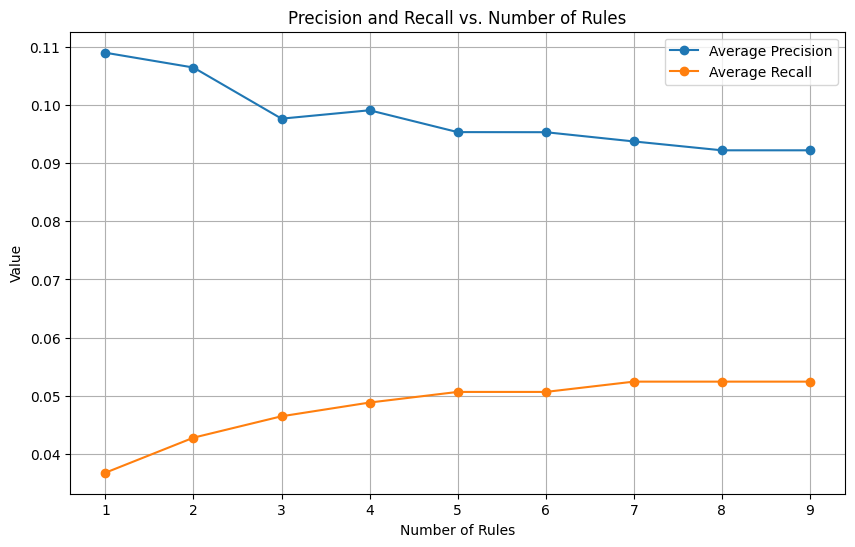

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), average_precisions, marker='o', label='Average Precision')
plt.plot(range(1, 10), average_recalls, marker='o', label='Average Recall')
plt.xlabel('Number of Rules')
plt.ylabel('Value')
plt.title('Precision and Recall vs. Number of Rules')
plt.legend()
plt.grid(True)
plt.show()


#### Observations:

1. Precision:
- Initially, precision is relatively high, especially if the top rules are very strong.
- As we increase the number of rules, precision decreases slightly. This is because we're including more recommendations, some of which might be less accurate.
However, the decrease in precision is often gradual, as we're still using rules with relatively high confidence.

2. Recall:
- Recall typically increases as we include more rules.
- With more rules, we're more likely to recommend a wider range of items, increasing the chance of matching items in the test set.
- The increase in recall often shows a diminishing returns pattern - rapid increase initially, then slowing down as you add more rules.

**Overall trend:**
- We see a slight trade-off between precision and recall.
- The ideal number of rules is often where we see a good balance between precision and recall.
- After a certain point, adding more rules might not significantly improve recall while potentially decreasing precision.

## 2.8 Sample User Analysis

In [54]:
def compute_precision_recall(user, num_rules, test_data, train_data, association_rules):
    user_movies = set(test_data[test_data['userId'] == user]['Movie Ids'].iloc[0])
    user_recommendations = generate_recommendations(user, train_data, association_rules, num_rules)
    intersection = user_movies.intersection(user_recommendations)
    precision = len(intersection) / len(user_recommendations) if len(user_recommendations) > 0 else 0
    recall = len(intersection) / len(user_movies) if len(user_movies) > 0 else 0
    return precision, recall

In [56]:
random.seed(42)  
sample_users = random.sample(test_df['userId'].unique().tolist(), 10)

num_rules_range = list(range(1, 10))
precision_data = {user: [] for user in sample_users}
recall_data = {user: [] for user in sample_users}

In [57]:
for user in sample_users:
    for num_rules in num_rules_range:
        precision, recall = compute_precision_recall(user, num_rules, test_df, training_df, top_100_rules_confidence)
        precision_data[user].append(precision)
        recall_data[user].append(recall)

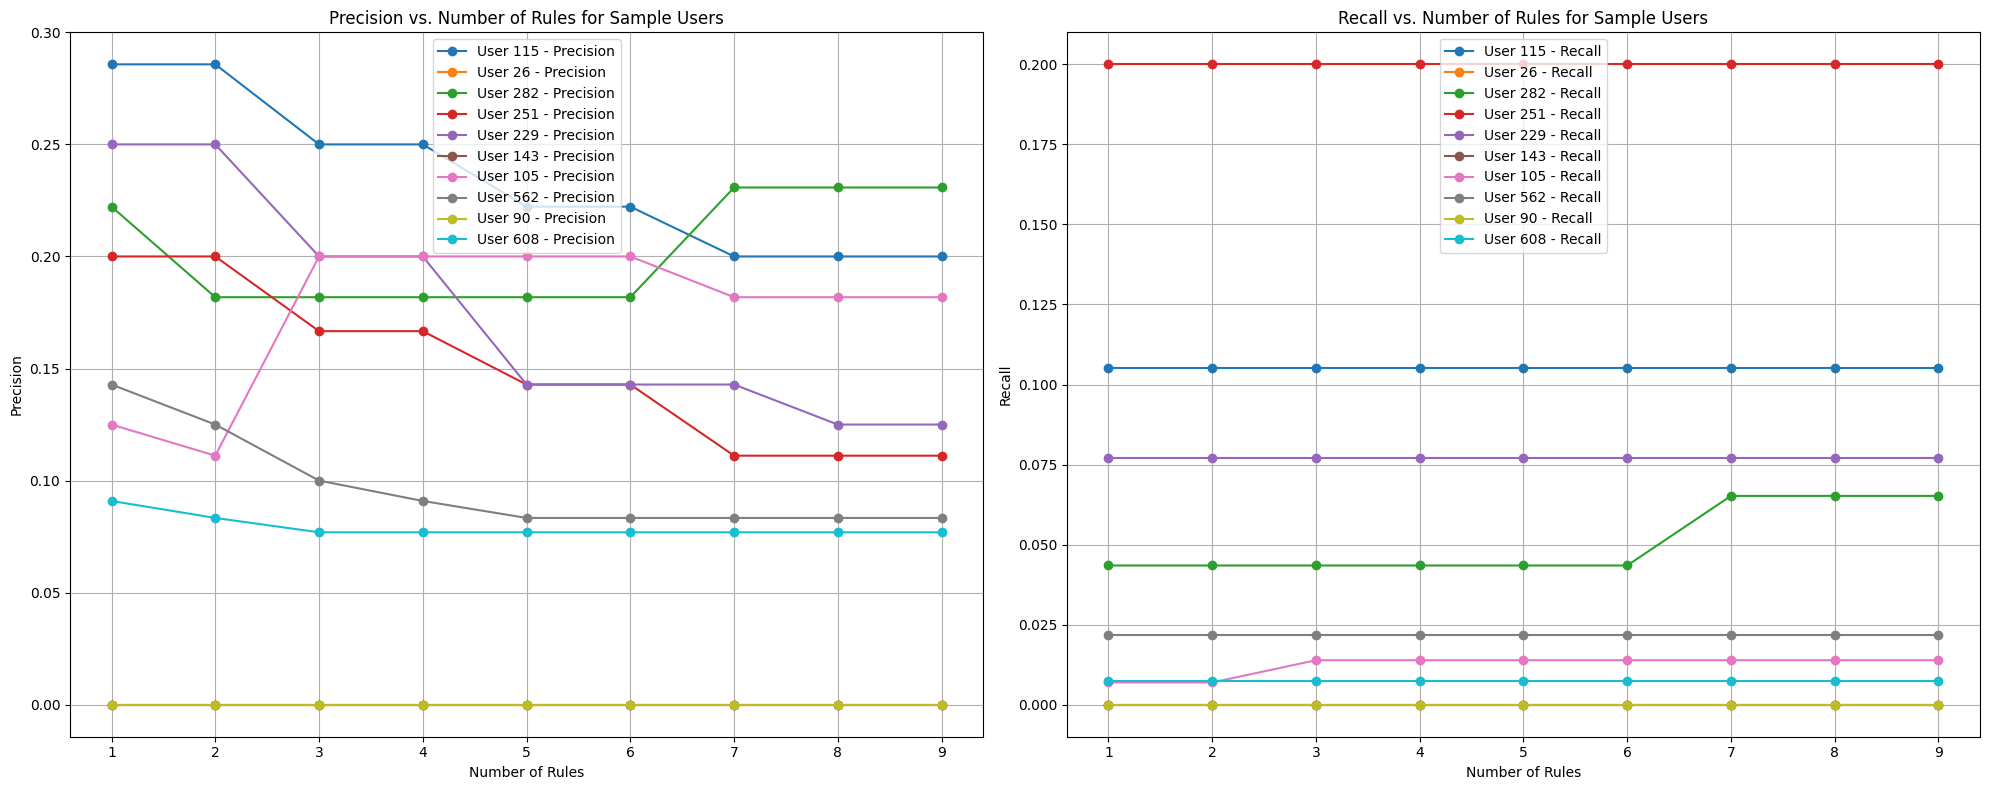

In [61]:
import matplotlib.pyplot as plt

# Creating subplots for precision and recall, side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns for subplots

# Plot Precision for each user in the first subplot (left)
for user in sample_users:
    axes[0].plot(num_rules_range, precision_data[user], marker='o', label=f'User {user} - Precision')

axes[0].set_xlabel('Number of Rules')
axes[0].set_ylabel('Precision')
axes[0].set_title('Precision vs. Number of Rules for Sample Users')
axes[0].legend()
axes[0].grid(True)

# Plot Recall for each user in the second subplot (right)
for user in sample_users:
    axes[1].plot(num_rules_range, recall_data[user], marker='o', label=f'User {user} - Recall')

axes[1].set_xlabel('Number of Rules')
axes[1].set_ylabel('Recall')
axes[1].set_title('Recall vs. Number of Rules for Sample Users')
axes[1].legend()
axes[1].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


---
---